<a href="https://colab.research.google.com/github/akheradmand/MachineLearning/blob/main/48/48-2/load_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from mlp import Mlp

In [12]:
dataset = load_digits()
# dataset

In [13]:
X=dataset.data
Y=dataset.target
Y=np.eye(10)[Y]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [14]:
print(f"{'accuracy_train':^25}{'loss_train':^25}{'accuracy_test':^25}{'loss_test':^25}")

model = Mlp(epochs=80,η=0.001,D_in=X_train.shape[1],
            H1=128,H2=32,D_out=Y_train.shape[1])

train_losses,train_accs,test_losses,test_accs=model.fit(X_train,Y_train,X_test,Y_test)


     accuracy_train             loss_train              accuracy_test              loss_test        
   0.21294363256784968      0.31331873479917205      0.35555555555555557      0.2832594722051313    
   0.3827418232428671       0.2757610290297452              0.45              0.2635995210054947    
   0.4933890048712596       0.25733519932269416      0.5055555555555555       0.2521971146007822    
   0.5734168406402227       0.24261491070151667      0.5777777777777777       0.24215408982197284   
   0.6464857341684064       0.23019429853994838      0.6138888888888889       0.23345555919700275   
   0.6903270702853166       0.2191705422748717       0.6472222222222223       0.22592953962936274   
   0.7230340988169798       0.2094044747218209       0.6527777777777778       0.21981113777376157   
   0.7480862908837856       0.20075873888827142      0.6777777777777778       0.21416760568239665   
   0.7724425887265136       0.1924714790051447       0.6888888888888889       0.20879835271

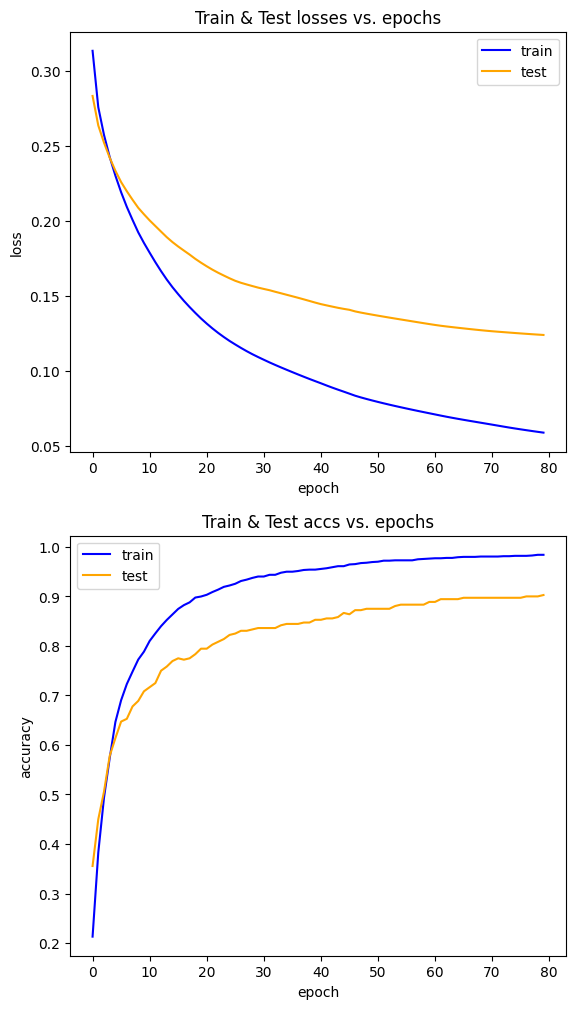

In [15]:
fig,(ax1,ax2)=plt.subplots(2,1)
fig.set_figheight(12)

ax1.plot(train_losses,c="blue")
ax1.plot(test_losses,c="orange")
ax1.set_title("Train & Test losses vs. epochs")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend(['train','test'])

ax2.plot(train_accs,c="blue")
ax2.plot(test_accs,c="orange")
ax2.set_title("Train & Test accs vs. epochs")
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend(['train','test'])

In [17]:
import cv2

image = cv2.imread("test1.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = image.reshape(1,64)

x = image
# forward

y_pred = model.predict(x)

print(y_pred)
print(np.argmax(y_pred))

[array([[0.00632023, 0.0425815 , 0.50244187, 0.01715924, 0.20565716,
        0.00677909, 0.04011631, 0.0087609 , 0.0333466 , 0.13683711]])]
2


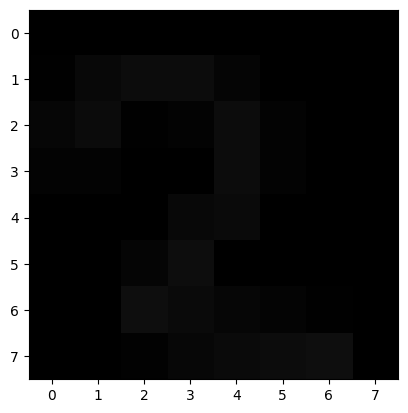

In [19]:
plt.imshow(cv2.imread("test1.png"))